Frecuencia de métodos de pago
efectivo:111
qr:91
tarjeta:69
transferencia:72
Productos más vendidos por medio de pago
        medio_pago             nombre_producto  cantidad
15        efectivo                Chicle Menta        14
0         efectivo        Aceite de Girasol 1L        12
48        efectivo  Pizza Congelada Muzzarella        11
87              qr  Hamburguesas Congeladas x4        17
107             qr          Queso Rallado 150g        14
80              qr         Dulce de Leche 400g        12
127        tarjeta       Aceitunas Verdes 200g        11
138        tarjeta      Energética Nitro 500ml        10
171        tarjeta         Toallas Húmedas x50         8
219  transferencia        Salsa de Tomate 500g        17
188  transferencia       Chocolate Amargo 100g        12
204  transferencia          Mascarilla Capilar        12
Ciudades con mayor indicencia por medio de pago
       medio_pago       ciudad  num_clientes
2        efectivo      Cordoba             7
4  

C:\Users\SOFIA\AppData\Local\Temp\ipykernel_12216\3518896556.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medios, y=conteo, palette='viridis')


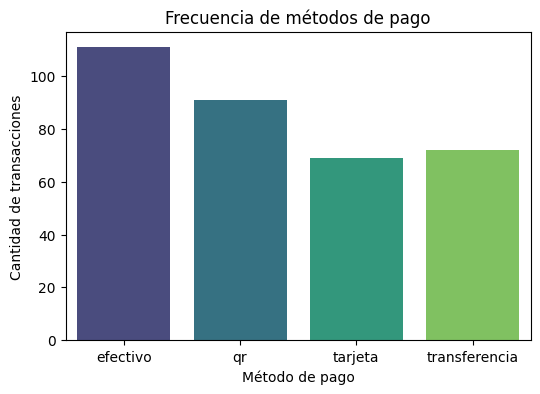

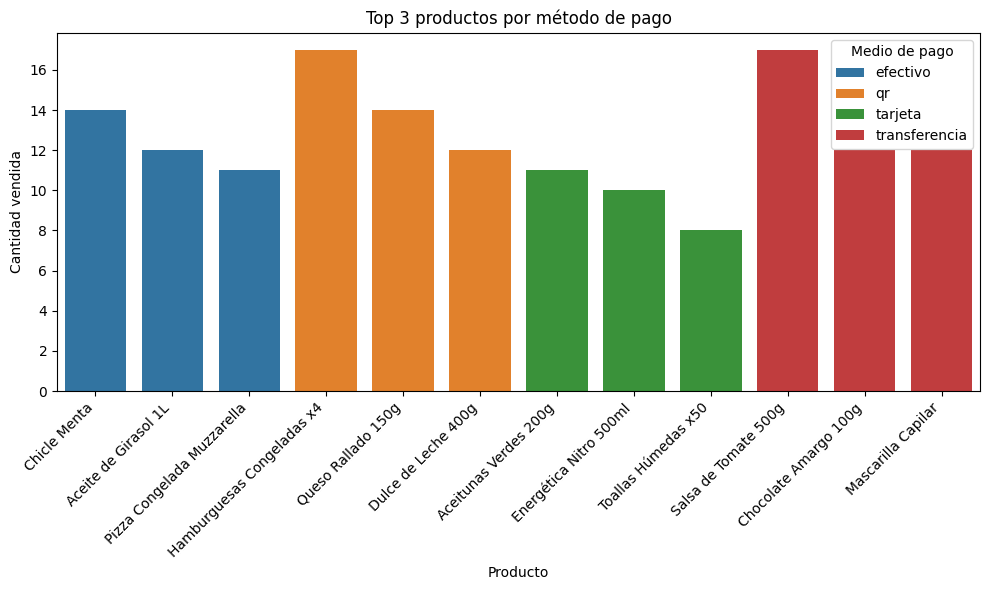

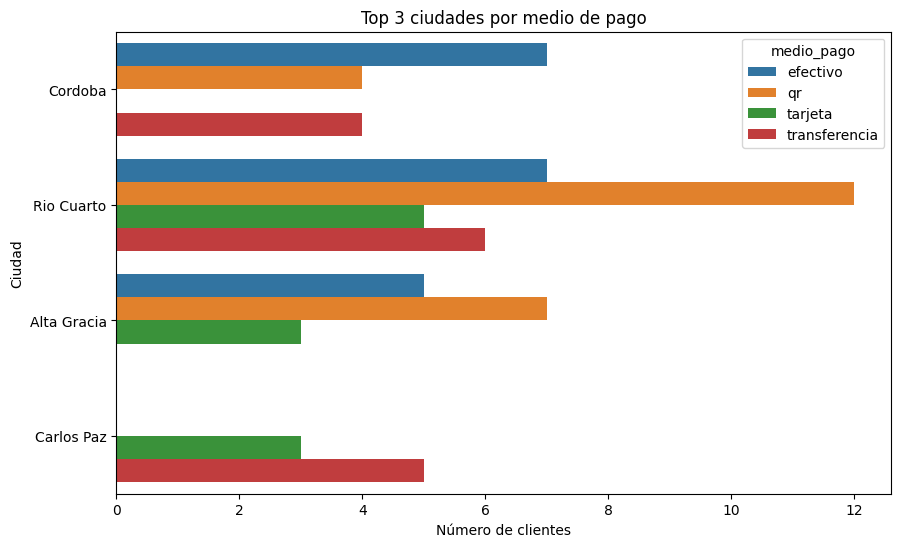

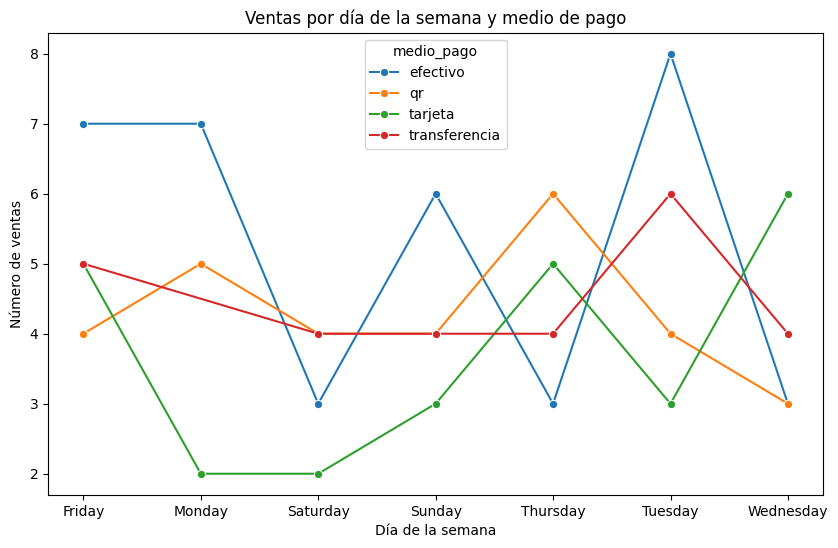

Conclusión 

El método de pago más usado es el efectivo con 111 clientes.
El método de pago menos usado es la tarjeta con 69 clientes
Los 3 productos más comprados con efectivo son:
 Chicle Menta 
 Aceite de Girasol 1L 
 Pizza Congelada Muzzarella
Los 3 productos más comprados con tarjeta son: 
 Aceitunas Verdes 200g 
 Energética Nitro 500ml 
 Toallas Húmedas x50
Tanto la ciudad de Cordoba como Rio Cuarto usan efectivo para comprar.
Rio Cuarto usa más QR que efectivo, siendo efectivo el segundo método de pago más usado.
Los días Lunes, Martes y Viernes los clientes compran con efectivo.
Los días Jueves usan más el QR para comprar en la tienda.
Los días Miércoles usan tarjeta para comprar en la tienda.
Los días Sábados usan más los QR y transferencia para comprar la tienda.


In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

ventas=pd.read_excel("Ventas.xlsx")
clientes=pd.read_excel('Clientes.xlsx')
detalle=pd.read_excel('Detalle_ventas.xlsx')
productos=pd.read_excel('Productos.xlsx')

ventas_detalle=pd.merge(ventas,detalle,on='id_venta')
datos=pd.merge(ventas_detalle,productos,on='id_producto')
datos=pd.merge(datos,clientes,on='id_cliente')
datos=pd.merge(datos, productos,on='id_producto')

medios,conteo=np.unique(datos['medio_pago'],return_counts=True)
frecuencia_medios=dict(zip(medios,conteo))

print("Frecuencia de métodos de pago")
for medio, total in frecuencia_medios.items():
    print(f"{medio}:{total}")

productos_por_medio =(
    datos.groupby(['medio_pago','nombre_producto'])['cantidad']
    .sum()
    .reset_index()
)

top_productos=productos_por_medio.sort_values(
    ['medio_pago','cantidad'],ascending=[True,False]
).groupby('medio_pago').head(3)

print('Productos más vendidos por medio de pago')
print(top_productos)

ciudades=(
    datos.groupby(['medio_pago','ciudad'])['id_cliente']
    .nunique()
    .reset_index()
    .rename(columns={'id_cliente':'num_clientes'})
)
top_ciudades=ciudades.sort_values(['medio_pago','num_clientes'],ascending=[True,False]).groupby('medio_pago').head(3)
print('Ciudades con mayor indicencia por medio de pago')
print(top_ciudades)

datos['fecha']=pd.to_datetime(datos['fecha'])
datos['dia_semana']=datos['fecha'].dt.day_name()

dias=(
    datos.groupby(['medio_pago','dia_semana'])['id_venta']
    .nunique()
    .reset_index()
    .rename(columns={'id_venta':'ventas_dia'})
)

print('Ventas por día de la semana y medio de pago')
print(dias)

medios=list(frecuencia_medios.keys())
conteo=list(frecuencia_medios.values())

plt.figure(figsize=(6,4))
sns.barplot(x=medios, y=conteo, palette='viridis')
plt.title('Frecuencia de métodos de pago')
plt.ylabel('Cantidad de transacciones')
plt.xlabel('Método de pago')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=top_productos, x='nombre_producto', y='cantidad', hue='medio_pago')
plt.xticks(rotation=45,ha='right')
plt.title("Top 3 productos por método de pago")
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
plt.legend(title="Medio de pago")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=top_ciudades, y='ciudad', x='num_clientes', hue='medio_pago', dodge=True)
plt.title("Top 3 ciudades por medio de pago")
plt.xlabel("Número de clientes")
plt.ylabel("Ciudad")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=dias, x='dia_semana', y='ventas_dia', hue='medio_pago', marker='o')
plt.title("Ventas por día de la semana y medio de pago")
plt.xlabel("Día de la semana")
plt.ylabel("Número de ventas")
plt.show()

print("Conclusión \n")
print("El método de pago más usado es el efectivo con 111 clientes.")
print("El método de pago menos usado es la tarjeta con 69 clientes")
print("Los 3 productos más comprados con efectivo son:\n Chicle Menta \n Aceite de Girasol 1L \n Pizza Congelada Muzzarella")
print("Los 3 productos más comprados con tarjeta son: \n Aceitunas Verdes 200g \n Energética Nitro 500ml \n Toallas Húmedas x50")
print("Tanto la ciudad de Cordoba como Rio Cuarto usan efectivo para comprar.")
print("Rio Cuarto usa más QR que efectivo, siendo efectivo el segundo método de pago más usado.")
print("Los días Lunes, Martes y Viernes los clientes compran con efectivo.")
print("Los días Jueves usan más el QR para comprar en la tienda.")
print("Los días Miércoles usan tarjeta para comprar en la tienda.")
print("Los días Sábados usan más los QR y transferencia para comprar la tienda.")